# Question2
## Collect and store data

### Collect data from Archive API and store data

In [ ]:
import argparse
import requests
import os
import json

In [ ]:
archive_key = os.getenv('archive_key')

In [ ]:
h={
   'api-key':archive_key
}

In [ ]:
directory_raw='../midterm/data/raw'
if not os.path.exists(directory_raw):
    os.makedirs(directory_raw)

In [ ]:
months = list(range(6,13))   #get 6 months data of 2016

In [ ]:
def get_by_year(year,months): #get the archive data
    for month in months:
        url = 'https://api.nytimes.com/svc/archive/v1/' + year + '/' + str(month) + '.json'
        archive_data = []
        archive_data.append(requests.get(url,headers=h).json())
        #print(url,month)
        with open(directory_raw+'/archive/'+'archive_' + year + '_'+ str(month) +'.json', 'w') as outfile:
            json.dump(archive_data, outfile)
        #print("Json dumped in folder",month)

In [ ]:
get_by_year('2016',months)

## Analysis of Archive API 1: Distribution of artical type

In [1]:
import json
import csv
import glob

In [2]:
def file_list(file_name,category):    #read file
    category_list = []
    with open(file_name,encoding='utf-8', errors="ignore") as file:
        content = json.load(file)
        for i in range(len(content['response']['docs'])):
            category_list.append(content['response']['docs'][i][category])
    return category_list

In [3]:
path = glob.glob('C:/Users/Alex/Documents/Python Scripts/Midterm/data/raw/archive/*')

In [5]:
for i in range(len(path)):
    path[i]=path[i].replace('/','\\')  #change the path format for windows
path

['C:\\Users\\Alex\\Documents\\Python Scripts\\Midterm\\data\\raw\\archive\\archive_2016_10.json',
 'C:\\Users\\Alex\\Documents\\Python Scripts\\Midterm\\data\\raw\\archive\\archive_2016_11.json',
 'C:\\Users\\Alex\\Documents\\Python Scripts\\Midterm\\data\\raw\\archive\\archive_2016_12.json',
 'C:\\Users\\Alex\\Documents\\Python Scripts\\Midterm\\data\\raw\\archive\\archive_2016_7.json',
 'C:\\Users\\Alex\\Documents\\Python Scripts\\Midterm\\data\\raw\\archive\\archive_2016_8.json',
 'C:\\Users\\Alex\\Documents\\Python Scripts\\Midterm\\data\\raw\\archive\\archive_2016_9.json']

In [8]:
whole_list_doctype = []    #distribution of doctype
for file in path:
    whole_list_doctype.extend(file_list(file,'document_type'))

In [7]:
from collections import Counter

In [9]:
counts_doctype = dict(Counter(whole_list_doctype))

In [10]:
print('Distribution of document type')
for doctype,fre in counts_doctype.items():
    print("Type: ", doctype, "\t", "Amount: ", fre)

Distribution of document type
Type:  multimedia 	 Amount:  3319
Type:  article 	 Amount:  29135
Type:  blogpost 	 Amount:  1084


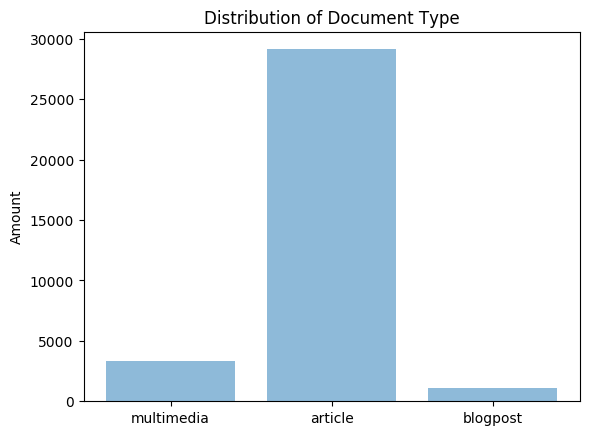

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
 
objects = counts_doctype.keys()
y_pos = np.arange(len(objects))
performance = counts_doctype.values()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Amount')
plt.title('Distribution of Document Type')
 
plt.show()

In [14]:
whole_list_mattype = []    #distribution of material type
for file in path:
    whole_list_mattype.extend(file_list(file,'type_of_material'))

In [16]:
counts_mattype = dict(Counter(whole_list_mattype))

In [17]:
print('Distribution of Type of Material')
for mattype,fre in counts_mattype.items():
    print("Type: ", mattype, "\t", "Amount: ", fre)

Distribution of Type of Material
Type:  Interactive Feature 	 Amount:  1222
Type:  News 	 Amount:  21029
Type:  Slideshow 	 Amount:  1363
Type:  Schedule 	 Amount:  473
Type:  Op-Ed 	 Amount:  1774
Type:  Obituary (Obit) 	 Amount:  526
Type:  Editorial 	 Amount:  638
Type:  Quote 	 Amount:  166
Type:  Review 	 Amount:  1841
Type:  Letter 	 Amount:  833
Type:  Question 	 Amount:  273
Type:  Biography 	 Amount:  21
Type:  Blog 	 Amount:  1084
Type:  Brief 	 Amount:  129
Type:  List 	 Amount:  125
Type:  Video 	 Amount:  684
Type:  News Analysis 	 Amount:  61
Type:  briefing 	 Amount:  523
Type:  None 	 Amount:  50
Type:  Interview 	 Amount:  21
Type:  Text 	 Amount:  9
Type:  An Appraisal 	 Amount:  14
Type:  Correction 	 Amount:  55
Type:  Paid Death Notice 	 Amount:  548
Type:  An Analysis; News Analysis 	 Amount:  10
Type:  Obituary 	 Amount:  46
Type:  Letter; Editorial 	 Amount:  1
Type:  Special Report 	 Amount:  16
Type:  Newsletter 	 Amount:  2
Type:  An Analysis 	 Amount:  1


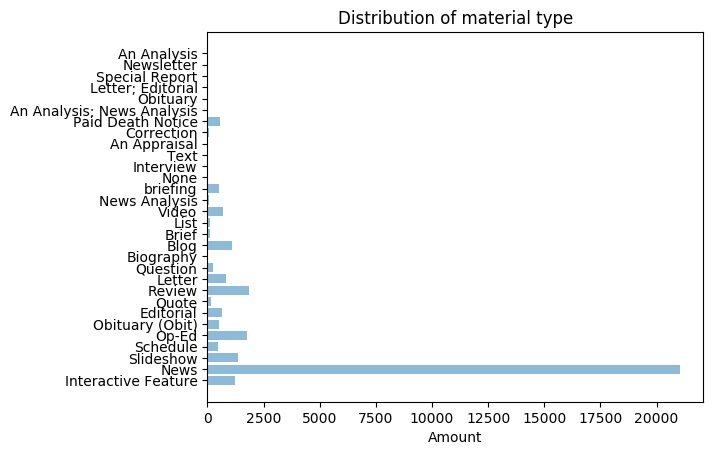

In [19]:
objects = counts_mattype.keys()
y_pos = np.arange(len(objects))
performance = counts_mattype.values()
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Amount')
plt.title('Distribution of material type')
 
plt.show()

## Analysis of Archive API 2: Artcial rank status

In [20]:
def read_keywords(file):    # get the rank status list
    with open(file,encoding='utf-8',errors='ignore') as file:
        content = json.load(file)
        whole_list = []
        for i in range(len(content['response']['docs'])):
            for j in range(len(content['response']['docs'][i]['keywords'])):
                key_word_list = []
                key_word_list.extend([content['response']['docs'][i]['headline']['main'],content['response']['docs'][i]['news_desk']])
                if 'rank' in content['response']['docs'][i]['keywords'][j].keys():
                    key_word_list.extend([content['response']['docs'][i]['keywords'][j]['rank']])
                else:
                    key_word_list.extend(['null'])
                if 'is_major' in content['response']['docs'][i]['keywords'][j].keys():
                    key_word_list.extend([content['response']['docs'][i]['keywords'][j]['is_major']])
                else:
                    key_word_list.extend(['null'])
                if 'name' in content['response']['docs'][i]['keywords'][j].keys():
                    key_word_list.extend([content['response']['docs'][i]['keywords'][j]['name']])
                else:
                    key_word_list.extend(['null'])
                if 'value' in content['response']['docs'][i]['keywords'][j].keys():
                    key_word_list.extend([content['response']['docs'][i]['keywords'][j]['value']])
                else:
                    key_word_list.extend(['null'])
                whole_list.append(key_word_list)
    return whole_list

In [21]:
rank_status_list = []
for file in path:
    rank_status_list.extend(read_keywords(file))

In [22]:
with open('archive_rank_status.csv','w',newline='',encoding="utf-8") as f:
        w = csv.writer(f)
        w.writerow(['Headline','Section/Subsection','Rank','Is_Major','Name','Value'])
        w.writerows(rank_status_list)                    #please check archive_rank_status.csv file in the folder

### Collect data from Community API and store data

In [ ]:
from datetime import timedelta, date                     
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2016, 1, 1)
end_date = date(2017, 1, 1)                              #get time-period and filenames for year 2016

In [ ]:
dates = []
filename=[]

In [ ]:
for single_date in daterange(start_date, end_date):
    dates.append(single_date.strftime("%Y/%m/%d"))
    filename.append(single_date.strftime("%Y-%m-%d"))

In [ ]:
a = 0
for date in dates:
    url = 'http://api.nytimes.com/svc/community/v3/user-content/by-date.json?date='
    user_content = []
    user_content.append(requests.get(url+date,headers=h).json())
    try:
        with open(directory_raw+'/user_content/' + filename[a] +'.json', 'w') as outfile:
                json.dump(user_content, outfile)
                #print("Json dumped in folder",a)
                a = a + 1
    except json.decoder.JSONDecodeError:
        a = a + 1
        print("N'est pas JSON")
        continue

## Analysis of Community API: Zipf's Law

In [23]:
path = glob.glob('C:/Users/Alex/Documents/Python Scripts/Midterm/data/raw/user_content/*') #read user content file
for i in range(len(path)):
    path[i]=path[i].replace('/','\\')  #change the path format for windows

In [24]:
whole_id = []     #calulate how many comments each user public
for file_name in path:
    with open(file_name,encoding='utf-8', errors="ignore") as test_file:
        file = json.load(test_file)
        id_list = []
        for i in range(len(file['results']['comments'])):
            id_list.append(file['results']['comments'][i]['userID'])
        whole_id.extend(id_list)

In [25]:
import collections
user_content_dict = dict(collections.Counter(whole_id)) 

In [26]:
sorted_dict = sorted(user_content_dict.items(), key=lambda item: item[1], reverse = True)  #sorted list

In [27]:
sorted_list = []                          #add rank column
a = 1
for item in sorted_dict:
    item = list(item)
    item.insert(0,a)
    a = a +1
    sorted_list.append(item)   

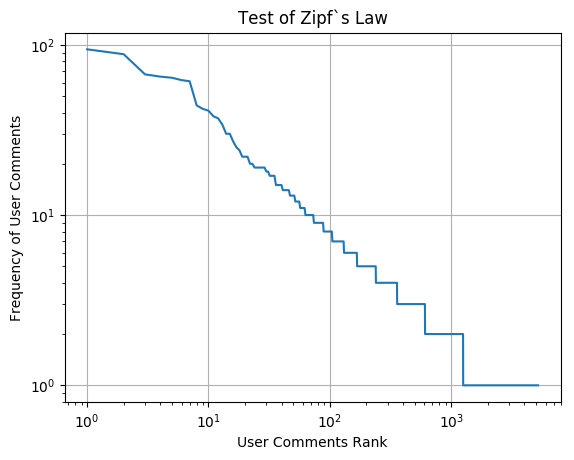

In [28]:
x = []
y = []
for item in sorted_list:
    x.append(item[0])
    y.append(item[2])

plt.loglog(x, y)              #generate log-log plot
plt.xlabel("User Comments Rank")
plt.ylabel("Frequency of User Comments")
plt.title("Test of Zipf`s Law")

plt.grid(True)
plt.show()